In [1]:
from google.cloud import bigquery

In [2]:
%load_ext google.cloud.bigquery

In [3]:
bq = bigquery.Client()

In [5]:
dry = bigquery.QueryJobConfig(dry_run=True)

In [7]:
q = bq.query("""
SELECT *
FROM bigquery-public-data.geo_us_boundaries.counties
LIMIT 10
""", job_config=dry)
q.total_bytes_processed / 1024**2 # MB

182.43214321136475

In [8]:
q = bq.query("""
SELECT county_geom
FROM bigquery-public-data.geo_us_boundaries.counties
LIMIT 10
""", job_config=dry)
q.total_bytes_processed / 1024**2 # MB

181.97120666503906

In [9]:
q = bq.query("""
SELECT county_name
FROM bigquery-public-data.geo_us_boundaries.counties
LIMIT 10
""", job_config=dry)
q.total_bytes_processed / 1024**2 # MB

0.027889251708984375

In [11]:
max_config = bigquery.QueryJobConfig(maximum_bytes_billed=100*1024**2) # 100 MB

q = bq.query("""
SELECT county_geom
FROM bigquery-public-data.geo_us_boundaries.counties
LIMIT 10
""", job_config=max_config)

q.to_dataframe()

InternalServerError: 500 Query exceeded limit for bytes billed: 104857600. 190840832 or higher required.

Location: US
Job ID: 8939956a-fb16-4b93-baf5-6c660f3cd2c2


In [12]:
max_config = bigquery.QueryJobConfig(maximum_bytes_billed=200*1024**2) # 200 MB

q = bq.query("""
SELECT county_geom
FROM bigquery-public-data.geo_us_boundaries.counties
LIMIT 10
""", job_config=max_config)

q.to_dataframe()

,county_geom
0,"POLYGON((-85.926296 32.054676, -85.920111 32.0..."
1,"POLYGON((-88.080207 31.677064, -88.080058 31.6..."
2,"POLYGON((-85.978793 33.327568, -85.978797 33.3..."
3,"POLYGON((-85.603465 33.788474, -85.603469 33.7..."
4,"POLYGON((-85.648139 33.359095, -85.648165 33.3..."
5,"POLYGON((-88.24154 33.802962, -88.241641 33.80..."
6,"POLYGON((-85.789466 34.086297, -85.789266 34.0..."
7,"POLYGON((-88.44169 32.146407, -88.441873 32.14..."
8,"POLYGON((-88.369055 32.742584, -88.369201 32.7..."
9,"POLYGON((-87.165662 31.542897, -87.166757 31.5..."


In [16]:
%%bigquery df
SELECT *
FROM `cs544-f23.region-us.INFORMATION_SCHEMA.JOBS_BY_PROJECT`
ORDER BY total_bytes_billed DESC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

In [21]:
print(df.loc[0]["query"])


SELECT *
FROM bigquery-public-data.geo_us_roads.us_national_roads
WHERE state_fips_code = 55



# Clustering

In [23]:
q = bq.query("""
SELECT *
FROM bigquery-public-data.geo_us_roads.us_national_roads
LIMIT 10
""", job_config=dry)
q.total_bytes_processed / 1024**2 # MB

9072.340412139893

In [24]:
# FIPS 55 is WI
q = bq.query("""
SELECT *
FROM bigquery-public-data.geo_us_roads.us_national_roads
WHERE state_fips_code = 55
LIMIT 10
""", job_config=dry)
q.total_bytes_processed / 1024**2 # MB

9072.340412139893

<Axes: >

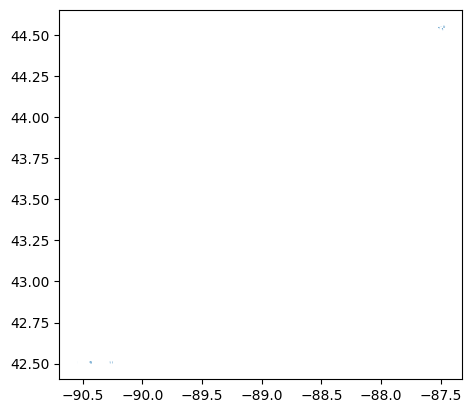

In [28]:
# FIPS 55 is WI
q = bq.query("""
SELECT *
FROM bigquery-public-data.geo_us_roads.us_national_roads
WHERE state_fips_code = 55
LIMIT 10
""", job_config=bigquery.QueryJobConfig(use_query_cache=False))
q.to_geodataframe().plot()

In [29]:
q.total_bytes_processed / 1024**2 # MB

141.01576900482178